# Measurements and operations on a single qubit

In quantum mechanics the order in which operators act and measurements are performed are very likely to matter. This exercise allows you to test this directly on a two level system!

**Learning goal:** To gain expirence with non-commutativity of operations and measurements.

We will work with a two level system (a single q-bit) spanned by the states $|0\rangle$ and $|1\rangle$. The operation we will consider is a rotation by $\theta$ around the $y$-axis. The rotation operator in the basis $|0\rangle$ and $|1\rangle$ is given by 

\begin{equation}
R_y(\theta)=\left(\begin{array}{cc} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{array}
\right)
\end{equation}


**Exercise 1:** Show using the matrix representation that $R_y(-\theta)R_y(\theta)=1$, where 1 is the 2x2 identity matrix. Make sure you understand why this is just as it should be.

Hence if we start the system in the state $|0\rangle$ and apply $R_y(-\theta)R_y(\theta)$ the system should not have changed. Let's check for $\theta=\pi/2$!


In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-03 14:03:11,022: Credentials are already in use. The existing account in the session will be replaced.


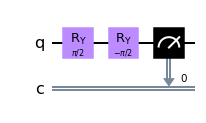

In [4]:
from math import pi
circ = QuantumCircuit(1,1)
theta = pi/2
circ.ry(theta,0)
circ.ry(-theta,0)
circ.measure(0,0)
circ.draw()

In [5]:
simulator = Aer.get_backend('aer_simulator')

# result = simulator.run(circ).result()
# counts = result.get_counts(circ)
# plot_histogram(counts, title='Bell-State counts')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


The result should be a list of 0'es (10 of them since we have repeated the experiment 10 times). This far nothing too surprising has happened, we have acted with the identity on the state $|0\rangle$ and the state has remained unchanged just as it should. 

Now let's introduce a measurement right after we have applied $R_y$ the first time. 

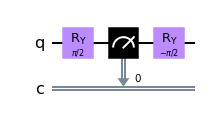

In [6]:
circ = QuantumCircuit(1,1)
circ.ry(theta,0)
circ.measure(0,0)
circ.ry(-theta,0)
circ.draw()

**Exercise 2:** What are the possible outcomes of this measurement?

**Exercise 3:** With which probability do you expect these outcomes to appear?

Now check the predictions you just made in the exercises by running the simulation below!

In [7]:
simulator = Aer.get_backend('aer_simulator')

# result = simulator.run(circ).result()
# counts = result.get_counts(circ)
# plot_histogram(counts, title='Bell-State counts')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['1', '1', '0', '1', '1', '0', '1', '0', '0', '0']


**Check:** Hopefully, the outcome was consistent with your prediction? If so just move ahead. If not go back and reconsider what could have gone wrong.

Now to understand what the system is after the 2nd rotation let's add a measurement at the end

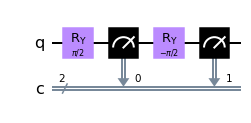

In [8]:
circ = QuantumCircuit(1,2)
circ.ry(theta,0)
circ.measure(0,0)
circ.ry(-theta,0)
circ.measure(0,1)
circ.draw()

**Exercise 4:** What is the state of the system right after the first measurement? (Your answer will depend on the outcome of the first measurement.)

**Exercise 5:** What is the state of the system just before the second measurement?

**Exercise 6:** What are the possible outcomes of the second measurement?

**Exercise 7:** With which probability do you expect the outcomes of the second measuremet to appear?

Finally check that you predictions made in the exercises by running the simulation below!

In [9]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['10', '11', '01', '10', '00', '11', '00', '10', '01', '10']


**How to read the result:** We have repeated the experiment 10 times and each time we made two measurements. The result of the first measurement is given in the rightmost digit in one of the pairs and the leftmost digit is the result of the second measurement.

**Illustration of the distribution of states by histograms**


This far we have always repeated the simulation 10 times. To check with better statistics we will now run the same experiment 1024 times. Obviously it will be somewhat bothersome to consider 1024 outputs in a long list, so let's instead display them as a histogram.

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(circ)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**How to read the result:** Each column is labeled by two digits. The result of the first measurement is given in the top digit and the lowest digit is the result of the second measurement.

**Conclusion** The fact that we have performed a measurement between the two rotation and the rotation back has changed the outcome of the measurement at the end drastically!

**Take home:** The order of measurements and operators in quantum mechanics matter! If you do a measurement you change the system (unless the system is already in an eigenstate of the operator you measure).